In [1]:
__depends__ = '../data/interim/parking_clean_dtypes.p'
__dest__ = 'count_by_date.p'

In [2]:
import pandas as pd

In [3]:
# pd.set_option('display.min_rows', 5000)
# pd.set_option('display.max_rows', 5000)

In [4]:
df = pd.read_pickle('../data/interim/parking_clean_dtypes.p')

In [5]:
df['violation'].value_counts()

violation
NO PARKING-STREET CLEANING        4162500
FAIL TO DSPLY MUNI METER RECPT    3033378
NO PARKING-DAY/TIME LIMITS        1755739
EXPIRED MUNI METER                1372985
DOUBLE PARKING                    1070946
FAIL TO DISP. MUNI METER RECPT     540640
DOUBLE PARKING-MIDTOWN COMML       321649
EXPIRED MUNI MTR-COMM MTR ZN       179841
NO PARKING-EXC. AUTH. VEHICLE      166588
NO PARKING-TAXI STAND               32983
ANGLE PARKING                       16512
NO PARKING-EXC. HNDICAP PERMIT      11254
NO PARKING-EXC. DSBLTY PERMIT        3137
BUS PARKING IN LOWER MANHATTAN       2080
ANGLE PARKING-COMM VEHICLE            465
NO PARKING-EXC. HOTEL LOADING         164
OT PARKING-MISSING/BROKEN METR         60
MISUSE PARKING PERMIT                  11
FRAUDULENT USE PARKING PERMIT           2
Name: count, dtype: int64

In [6]:
df = df.loc[df['violation'].str.contains('MUNI')].reset_index(drop=True)

In [7]:
d = df.groupby('date').count()

In [8]:
f = d['state'].to_frame()

In [9]:
f.columns = ['count']

In [10]:
f['date'] = f.index

In [11]:
f['dt'] = pd.to_datetime(f['date'])

In [12]:
f = f.sort_values('dt')

In [13]:
f.set_index('dt',drop=True,inplace=True)

In [14]:
f['count'].max()

np.int64(8761)

array([[<Axes: title={'center': 'count'}>]], dtype=object)

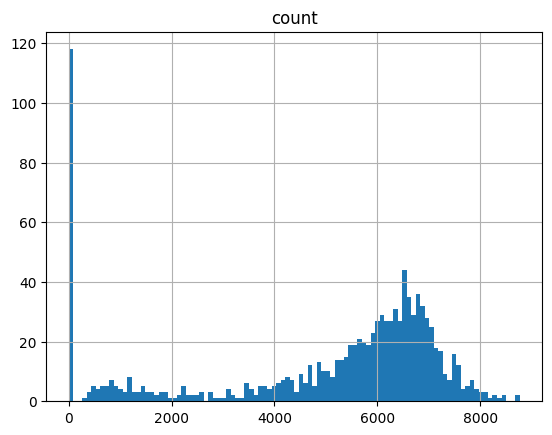

In [15]:
f.hist(bins=100)

In [16]:
f.loc[f['count']>30]

,count,date
dt,,
2016-01-02,348,01/02/2016
2016-01-04,367,01/04/2016
2016-01-05,363,01/05/2016
2016-01-06,432,01/06/2016
2016-01-07,463,01/07/2016
...,...,...
2018-12-26,6570,12/26/2018
2018-12-27,5904,12/27/2018
2018-12-28,3004,12/28/2018


<Axes: xlabel='date'>

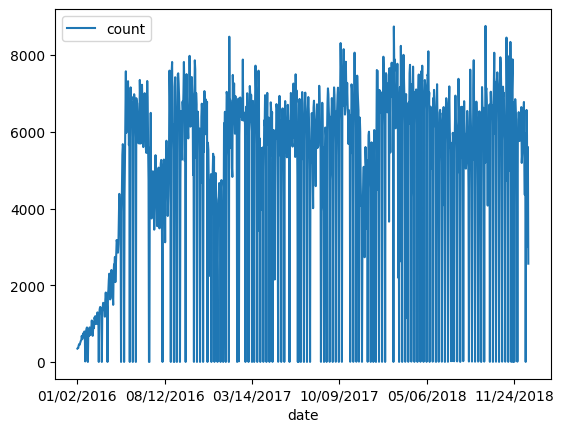

In [17]:
f.plot('date','count')

In [18]:
f.to_pickle('../data/interim/parking_count_by_date.p')